# Review

## Activation functions

* 우리 뇌의 뉴런은 임계치를 넘는 신호가 들어오면 출력함
* nonlinear: 복잡한 표현을 학습하기 위해 필요
* 그렇지 않으면, 결국 레이어 하나로 표현 가능해짐

<img src="https://miro.medium.com/max/1400/1*ZafDv3VUm60Eh10OeJu1vw.webp" width=800 />

### sigmoid

* 지수함수로 음수를 양수로, 자신의 값으로 나눠서 (0, 1) 
* sigmoid - 함수값이 (0, 1) 값이므로 exploding 안됨, 
* 미분 가능, 
* but, vanishing gradient 문제가 있음
* weights sum 값이 -100이나 100인 경우 gradient가 거의 0에 가까워서 saturated neurons 은 거의 변경되지 않음

### tanh

* scaled sigmoid function
* 함수값이 (-1,1) 사이고, (0,0) 에서 대칭
* RNN, LSTM

### relu (hinton, 2010)

* sigmoid 와 tanh 는 z 값이 너무 크거나 작으면 gradients 가 너무 작아져서 학습이 느려짐
* max(0, z)
* 가장 널리 사용됨 (특히 큰 규모의 모델에서)
* vanishing gradient 문제를 해결하고자 고안 (z 값이 0 보다 크면 미분값이 1임)
* but, [0, 무한대) 범위, 양수값이 너무 커서 exploding 될 수 있음
* 계산이 빠름
* weight sum 값이 마이너스이면 0 이 됨, sparse activation (일부만 살아 있음) => dying ReLU 문제 (미분값이 없으므로, weight 초기값에 변화가 없음)
* dropout (미니 배치마다 일정 비율로 node를 삭제) 와 유사함, relu 는 데이터 하나 하나당 적용 (여러 모델들로 학습, model averaging)
* relu 는 마이너스에서 미분 불가

### leaky relu(z) 

* relu 가 마이너스에서 미분되지 않는 단점을 보완
* max(0.1z, z)


In [ ]:
z = tf.constant([-20, -1.0, 0.0, 1.0, 20], dtype = tf.float32)
sigmoid_output = tf.keras.activations.sigmoid(z)
print('sigmoid_output', sigmoid_output)
tanh_output = tf.keras.activations.tanh(z)
print('tanh_output', tanh_output)
relu_output = tf.keras.activations.relu(z)
print('relu_output', relu_output)
leaky_relu_output = tf.nn.leaky_relu(z, alpha=0.2)
print('leaky_relu_output', leaky_relu_output)

sigmoid_output tf.Tensor([2.0611537e-09 2.6894143e-01 5.0000000e-01 7.3105860e-01 1.0000000e+00], shape=(5,), dtype=float32)
tanh_output tf.Tensor([-1.        -0.7615942  0.         0.7615942  1.       ], shape=(5,), dtype=float32)
relu_output tf.Tensor([ 0.  0.  0.  1. 20.], shape=(5,), dtype=float32)
leaky_relu_output tf.Tensor([-4.  -0.2  0.   1.  20. ], shape=(5,), dtype=float32)


## softmax

$$ softmax(z) = \frac{{e^{z_{j}}}}{\Sigma_{n=1}^{n}{e^{z_{n}}}}, (for \ j=1, 2, ...n)$$

* 큰 값을 강조하고 작은 값을 약화시키는 효과
* 0 이나 음수에도 적용 가능
* 결과값으로 확률이 필요한 경우 사용 (classification 등)


In [ ]:
#z=tf.random.normal(shape=(1,3))
z=[2.,1,0]
z=tf.reshape(z, shape=(1,3))
print('z', z)

softmax_output=tf.keras.activations.softmax(z)
print('softmax_output', softmax_output)

sigmoid_output=tf.keras.activations.sigmoid(z)
print('sigmoid_output', sigmoid_output)

z tf.Tensor([[2. 1. 0.]], shape=(1, 3), dtype=float32)
softmax_output tf.Tensor([[0.6652409  0.24472848 0.09003057]], shape=(1, 3), dtype=float32)
sigmoid_output tf.Tensor([[0.880797   0.73105854 0.5       ]], shape=(1, 3), dtype=float32)


## Gradient Vanishing

<img src="https://global-uploads.webflow.com/5ef788f07804fb7d78a4127a/6245a9aca7defe61cea5ea7d_Engati-vanishing-point-problem.jpg" width=400><img src="https://miro.medium.com/max/1178/1*54WxyNRIoO6OX8Jwa-caeQ.webp" width=400>



* gradient vanishing problem, 미분값 최대 0.25, 
* 인공 신경망을 7층으로 쌓으면?? $0.25^7 = 0.000061035 $
* 이것을 LR = 0.01 만큼만 갱신??


In [ ]:
import math
weight = 0.1
gradient = 0.25
n_layers = 7
lr = 0.01
for i in range(n_layers):
  gradient *= gradient
  weight -= lr * (weight * gradient)
  print(f'{i}-layer: gradient: {gradient:.5f}, weight: {weight:.5f}')

0-layer: gradient: 0.06250, weight: 0.09994
1-layer: gradient: 0.00391, weight: 0.09993
2-layer: gradient: 0.00002, weight: 0.09993
3-layer: gradient: 0.00000, weight: 0.09993
4-layer: gradient: 0.00000, weight: 0.09993
5-layer: gradient: 0.00000, weight: 0.09993
6-layer: gradient: 0.00000, weight: 0.09993



## Batch Normalization

* Batch 단위로 학습을 하게 되면 Batch 단위간에 데이터 분포의 차이가 발생할 수 있음

<img src="https://gaussian37.github.io/assets/img/dl/concept/batchnorm/4.png" width=800 />

In [ ]:
# tf.keras.layers.BatchNormalization
# Layer that normalizes its inputs.

# tf.keras.layers.BatchNormalization(
#     axis=-1,
#     momentum=0.99,
#     epsilon=0.001,
#     center=True,
#     scale=True,
#     beta_initializer='zeros',
#     gamma_initializer='ones',
#     moving_mean_initializer='zeros',
#     moving_variance_initializer='ones',
#     beta_regularizer=None,
#     gamma_regularizer=None,
#     beta_constraint=None,
#     gamma_constraint=None,
#     **kwargs
# )

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
image=x_train[0,...]/255.
print(image.shape)
reshaped_image = tf.reshape(image, (56,-1))
print(reshaped_image.shape)
batch_norm_layer = tf.keras.layers.BatchNormalization()
output=batch_norm_layer(reshaped_image)
print(output.shape)
for i, w in enumerate(batch_norm_layer.weights):
  print(i, w.shape)

## Regularization

The L2 regularization penalty is computed as: 

loss = l2 * reduce_sum(square(x))



In [ ]:
# tf.keras.regularizers.L2(
#     l2=0.01, **kwargs
# )

n_label = 10

layer = tf.keras.layers.Dense(
    n_label, 
    input_dim=5,
    kernel_initializer='ones',
    kernel_regularizer=tf.keras.regularizers.L2(),
    activity_regularizer=tf.keras.regularizers.L2(),
    )
n_examples = 5
tensor = tf.ones(shape=(n_examples, 5)) * 2.0
out = layer(tensor)
print(out)
print(tf.math.reduce_sum(layer.losses))
print('output_reg_loss: ', 50*10*10*0.01/n_examples)
print('kernel_reg_loss: ', 50*1*1*0.01)

tf.Tensor(
[[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]], shape=(5, 10), dtype=float32)
tf.Tensor(10.5, shape=(), dtype=float32)
output_reg_loss:  10.0
kernel_reg_loss:  0.5


## Dropout

* 과적합을 방지하기 위한 수단 중 가장 널리 사용됨
* 층별 뉴런(노드)의 일정 비율을 비활성화 함 (하이퍼 파라미터)
* dropout layer는 cnn의 fully connected layer 에 적용하는 것이 효과가 좋은 것으로 알려짐
* at each step 마다 해당 층의 뉴런 중 random 하게 선택된 n% 가 비활성화 됨

<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-23_at_6.19.24_PM.png" width=400 />


In [ ]:
tf.random.set_seed(0)
dropout_layer = tf.keras.layers.Dropout(.5, input_shape=(2,))
data = np.arange(1, 11).reshape(5, 2).astype(np.float32)
print(data)
outputs = dropout_layer(data, training=True)
print(outputs)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]
tf.Tensor(
[[ 0.  0.]
 [ 6.  8.]
 [ 0. 12.]
 [ 0. 16.]
 [18.  0.]], shape=(5, 2), dtype=float32)


# Step39 - 1D CNN Classification

https://github.com/laxmimerit/Human-Activity-Recognition-Using-Accelerometer-Data-and-CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
import urllib
url = 'https://raw.githubusercontent.com/laxmimerit/Human-Activity-Recognition-Using-Accelerometer-Data-and-CNN/master/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt'

processedList = []
for i, line in enumerate(urllib.request.urlopen(url)):
    try:
        line = line.decode('utf-8')
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        #print('last', last)
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)
        print('line', line)

Error at line number:  281873
line ['\n']
Error at line number:  281874
line ['\n']
Error at line number:  281875
line ['\n']


In [ ]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
data.shape

(343416, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
min(data['activity'].value_counts())

3555

In [ ]:
data['user'].value_counts()

20    35599
27    34958
29    34323
13    34255
36    32261
32    30778
18    29390
15    28154
6     27316
33    24593
35    19726
11     6199
17     5864
Name: user, dtype: int64

(array([30457., 35599., 34323., 34255., 28154., 62274., 32261., 29390.,
        30778., 25925.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

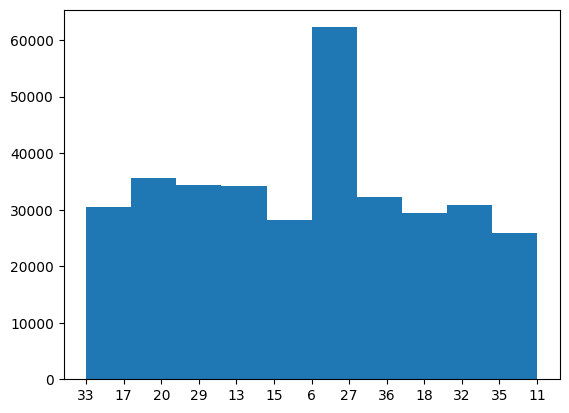

In [ ]:
plt.hist(data['user'])

In [ ]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [ ]:
data['activity'].value_counts().index

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

In [ ]:
data['user'].value_counts().index

Index(['20', '27', '29', '13', '36', '32', '18', '15', '6', '33', '35', '11',
       '17'],
      dtype='object')

In [ ]:
from itertools import cycle

users = data['user'].value_counts().index
colors = 'bckgmwry'
u2c = {k:v for (k, v) in zip(users, cycle(colors))}
u2c

{'20': 'b',
 '27': 'c',
 '29': 'k',
 '13': 'g',
 '36': 'm',
 '32': 'w',
 '18': 'r',
 '15': 'y',
 '6': 'b',
 '33': 'c',
 '35': 'k',
 '11': 'g',
 '17': 'm'}

In [ ]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['user'], data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['user'], data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['user'], data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, user, x, y, title):
  for i in range(len(x)-1):
    ax.plot([x.iloc[i], x.iloc[i+1]],[y.iloc[i], y.iloc[i+1]], color=u2c[user.iloc[i]])
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)

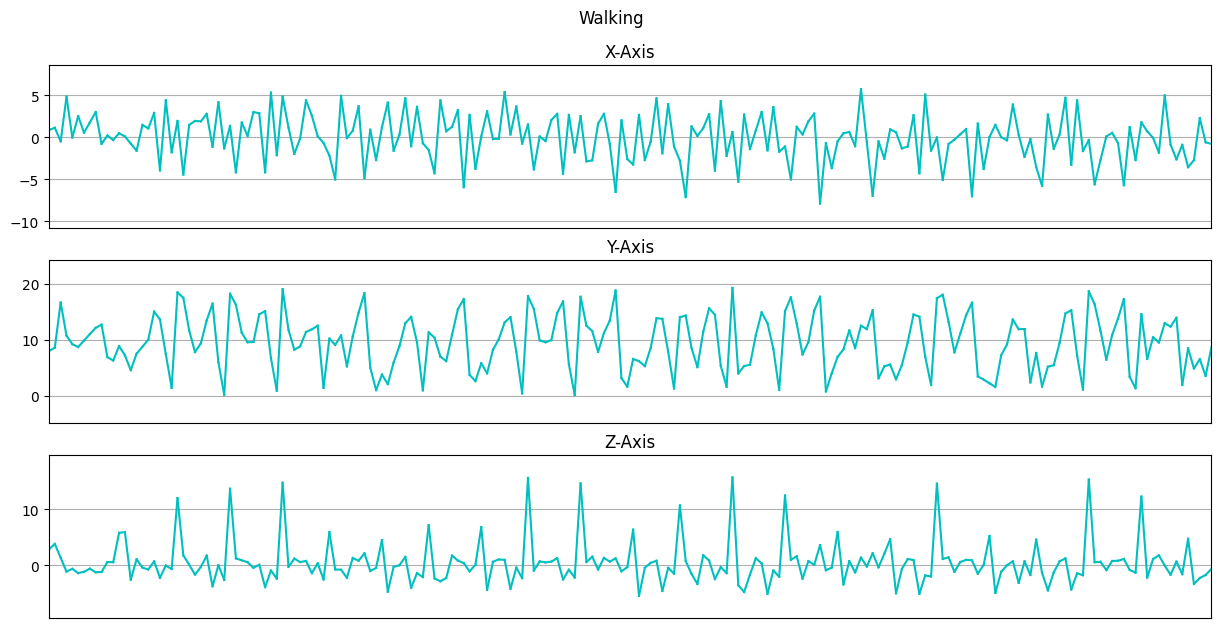

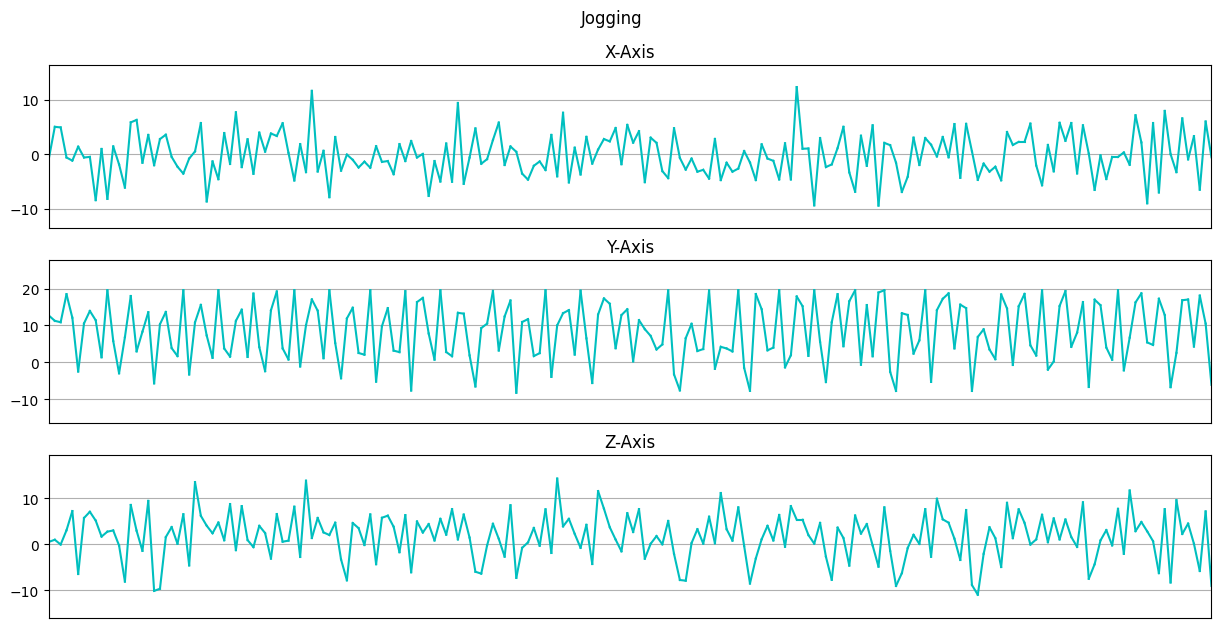

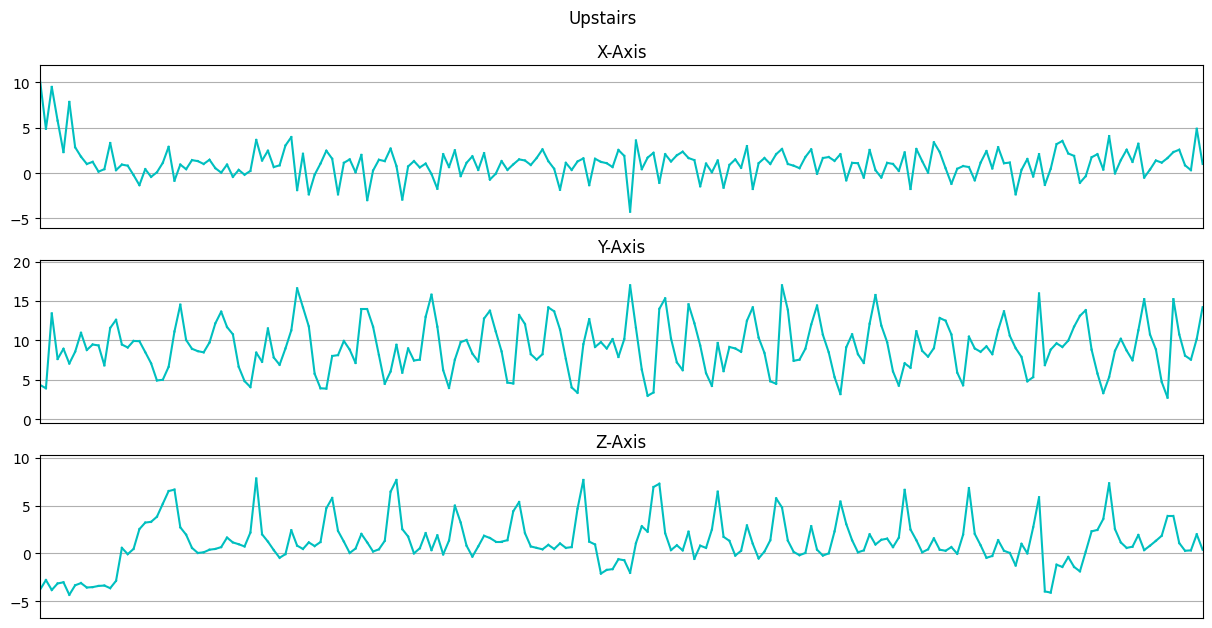

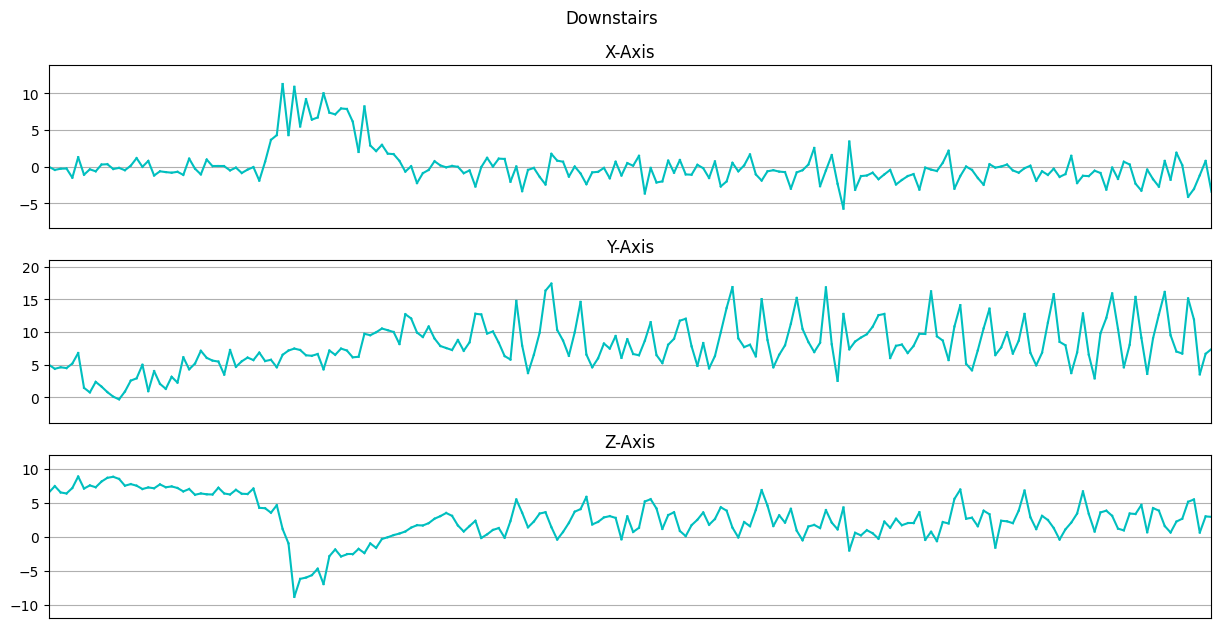

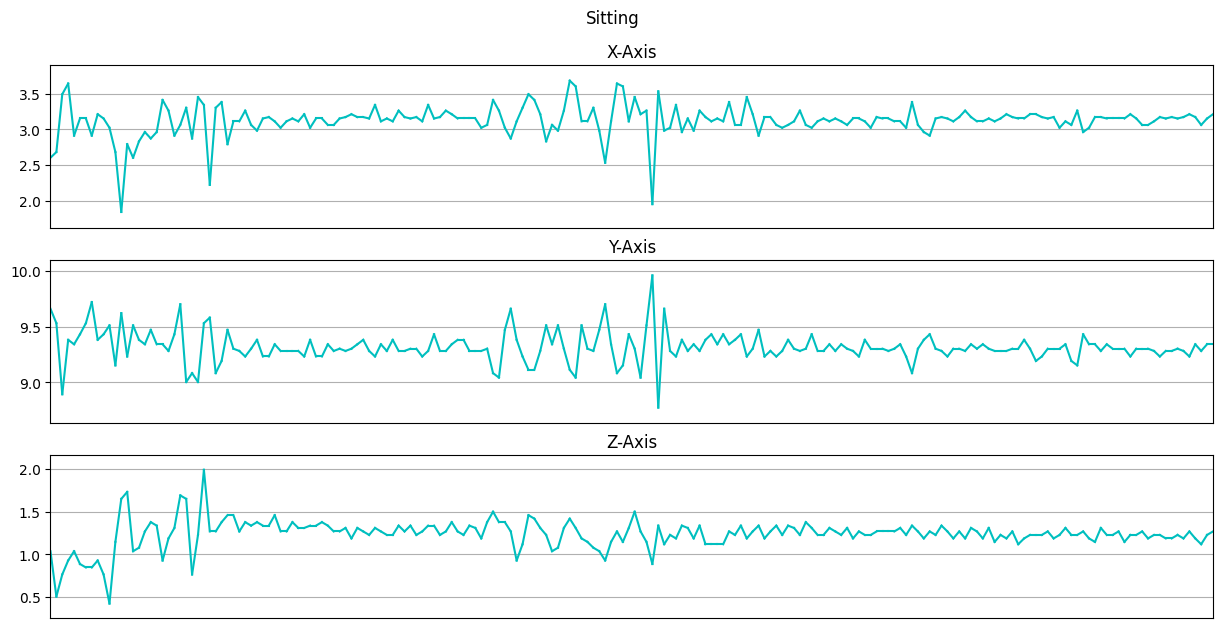

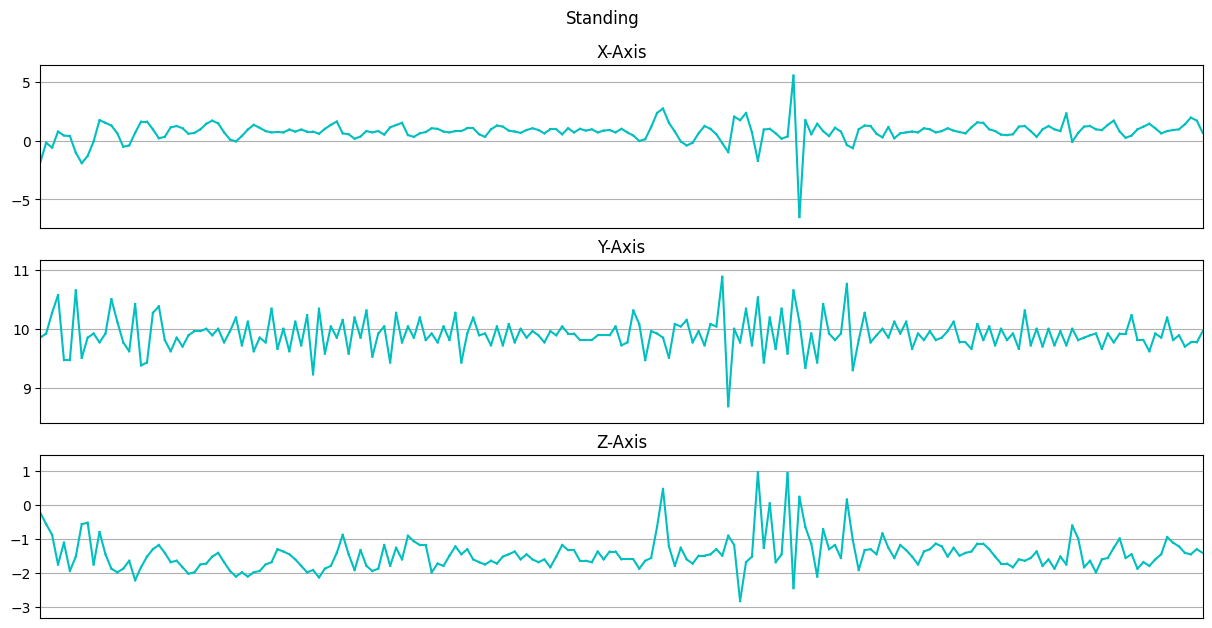

In [ ]:
for activity in data['activity'].value_counts().index:
    mask = (data['activity'] == activity)
    data_for_plot = data[mask][:200]
    plot_activity(activity, data_for_plot)

In [ ]:
bal_df = pd.DataFrame()
N = min(data['activity'].value_counts())
for activity in data['activity'].value_counts().index:
  mask = (data['activity'] == activity)
  sampled_df = data[mask].sample(N)
  bal_df = pd.concat([bal_df, sampled_df])
print(bal_df.shape)
bal_df.head()

(21330, 6)


,user,activity,time,x,y,z
67402,29,Walking,7179652202000,1.88,4.82,-3.405087
295310,32,Walking,24200402266000,5.33,13.57,-1.879608
15714,20,Walking,392022288000,0.93,6.05,-6.701211
267969,18,Walking,18380592238000,0.42,10.34,0.721878
81005,29,Walking,8017242290000,5.41,11.88,2.724070


In [ ]:
bal_df['activity'].value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
bal_df['label'] = label.fit_transform(bal_df['activity'])
bal_df.head()

,user,activity,time,x,y,z,label
67402,29,Walking,7179652202000,1.88,4.82,-3.405087,5
295310,32,Walking,24200402266000,5.33,13.57,-1.879608,5
15714,20,Walking,392022288000,0.93,6.05,-6.701211,5
267969,18,Walking,18380592238000,0.42,10.34,0.721878,5
81005,29,Walking,8017242290000,5.41,11.88,2.724070,5


In [ ]:
bal_df['label'].value_counts()

5    3555
1    3555
4    3555
0    3555
2    3555
3    3555
Name: label, dtype: int64

In [ ]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = bal_df[['x', 'y', 'z']]
y = bal_df['label'].values
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
print(type(X), type(y), type(scaled_X))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# https://brianmcfee.net/dstbook-site/content/ch09-stft/Framing.html

from statistics import mode

Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

def get_frames(X, y_label, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(X) - frame_size, hop_size):
        frame_len = i + frame_size
        x = X[i: frame_len, 0]
        y = X[i: frame_len, 1]
        z = X[i: frame_len, 2]
        
        # Retrieve the most often used label in this segment
        #print('mode', mode(y_label[i: frame_len]))
        label = mode(y_label[i: frame_len])
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

frame_X, frame_y = get_frames(scaled_X, y, frame_size, hop_size)
print(frame_X.shape, frame_y.shape)

(532, 80, 3) (532,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(frame_X, frame_y, test_size = 0.3, random_state = 0, stratify = frame_y)
X_train.shape, X_test.shape

((372, 80, 3), (160, 80, 3))

In [ ]:
#5: build a model with 1D CNN
def make_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(frame_size,3))) # shape=(80,3)
  model.add(tf.keras.layers.Conv1D(filters=100,
                                  kernel_size=11, activation='relu'))
  model.add(tf.keras.layers.MaxPool1D())
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout( rate=0.5))

  model.add(tf.keras.layers.Conv1D(filters=10, kernel_size=5, activation='relu'))
  model.add(tf.keras.layers.MaxPool1D())
  model.add(tf.keras.layers.Dropout( rate=0.5))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout( rate=0.5))
  model.add(tf.keras.layers.Dense(units=6, activation='softmax'))
  model.summary()
  return model

In [ ]:
#6: train and evaluate the model
model = make_model()

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Quantity to be monitored.
    min_delta = 0.001,   # Minimum change in the monitored quantity to qualify as an improvement,
    patience=20,          # Number of epochs with no improvement
    verbose=2,
    mode = 'auto',       #'min','max', 'auto'
    ) 

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(X_train, y_train, epochs=200, batch_size=200,
               validation_data = (X_test, y_test), verbose=2, callbacks=[callback])  # validation_split=0.2
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 70, 100)           3400      
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 35, 100)          0         
 g1D)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 35, 100)          400       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 35, 100)           0         
                                                                 
 conv1d_29 (Conv1D)          (None, 31, 10)            5010      
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 15, 10)         

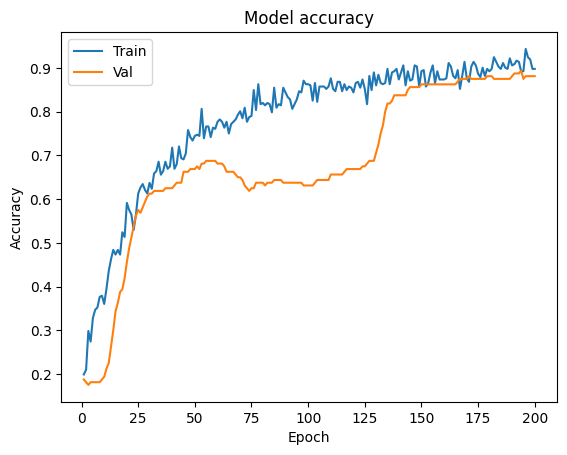

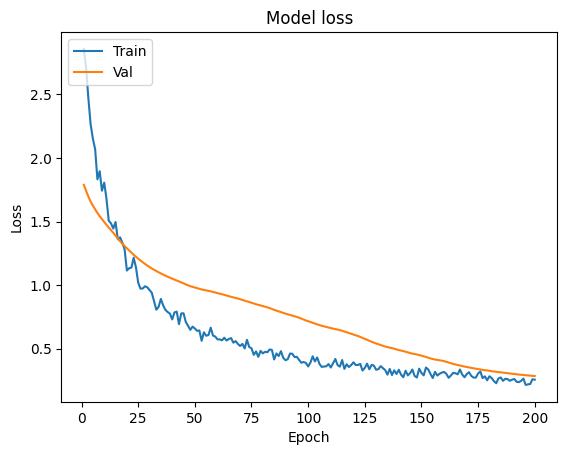

In [ ]:
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epochs = len(history.history['accuracy'])
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(ret)

In [ ]:
def make_2d_model():
  model = Sequential()
  model.add(tf.keras.layers.Input(shape=(frame_size,3, 1))) # shape=(80,3)
  model.add(Conv2D(16, (2, 2), activation = 'relu'))
  model.add(Dropout(0.5))

  model.add(Conv2D(32, (2, 2), activation='relu'))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(64, activation = 'relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(6, activation='softmax'))
  return model

In [ ]:
X_train_reshape = np.expand_dims(X_train, axis=-1)
X_test_reshape = np.expand_dims(X_test, axis=-1)
X_train_reshape.shape, X_test_reshape.shape

((372, 80, 3, 1), (160, 80, 3, 1))

In [ ]:
#6: train and evaluate the model
model = make_2d_model()

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Quantity to be monitored.
    min_delta = 0.001,   # Minimum change in the monitored quantity to qualify as an improvement,
    patience=20,          # Number of epochs with no improvement
    verbose=2,
    mode = 'auto',       #'min','max', 'auto'
    ) 

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(X_train_reshape, y_train, epochs=200, batch_size=200,
               validation_data = (X_test_reshape, y_test), verbose=2, callbacks=[callback])  # validation_split=0.2
train_loss, train_acc = model.evaluate(X_train_reshape, y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test_reshape,  y_test, verbose=2)

Epoch 1/200
2/2 - 2s - loss: 2.9736 - accuracy: 0.1210 - val_loss: 1.7400 - val_accuracy: 0.2313 - 2s/epoch - 1s/step
Epoch 2/200
2/2 - 0s - loss: 2.5537 - accuracy: 0.2151 - val_loss: 1.6769 - val_accuracy: 0.1875 - 177ms/epoch - 89ms/step
Epoch 3/200
2/2 - 0s - loss: 2.2604 - accuracy: 0.2769 - val_loss: 1.6304 - val_accuracy: 0.1875 - 202ms/epoch - 101ms/step
Epoch 4/200
2/2 - 0s - loss: 1.7441 - accuracy: 0.3952 - val_loss: 1.5954 - val_accuracy: 0.1875 - 173ms/epoch - 86ms/step
Epoch 5/200
2/2 - 0s - loss: 1.6135 - accuracy: 0.4220 - val_loss: 1.5685 - val_accuracy: 0.1875 - 141ms/epoch - 70ms/step
Epoch 6/200
2/2 - 0s - loss: 1.3368 - accuracy: 0.5242 - val_loss: 1.5465 - val_accuracy: 0.1875 - 100ms/epoch - 50ms/step
Epoch 7/200
2/2 - 0s - loss: 1.2559 - accuracy: 0.5565 - val_loss: 1.5278 - val_accuracy: 0.2188 - 97ms/epoch - 48ms/step
Epoch 8/200
2/2 - 0s - loss: 1.1731 - accuracy: 0.5699 - val_loss: 1.5093 - val_accuracy: 0.2562 - 96ms/epoch - 48ms/step
Epoch 9/200
2/2 - 0s -

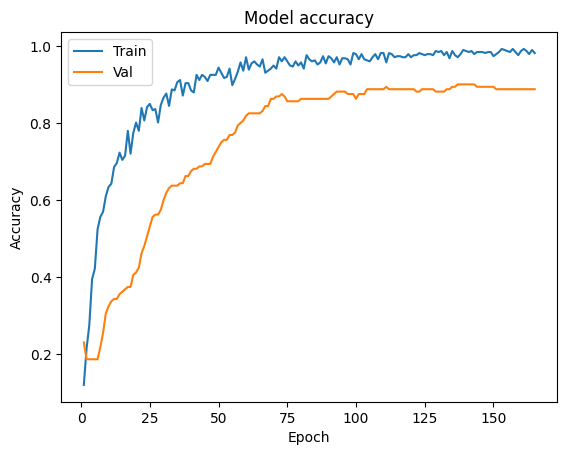

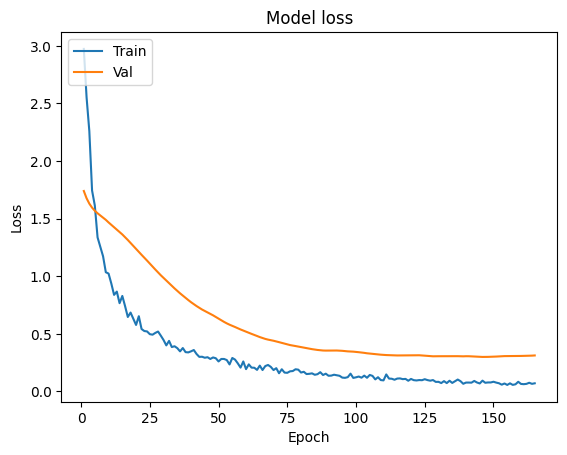

In [ ]:
plot_learningCurve(ret)

# 9.0 Convolution Neural Network

* classic classifier systems

* inputs -> feature extractor -> classifier

* visualization for cnn: [mnist](https://adamharley.com/nn_vis/cnn/3d.html)

## Convolution vs Correlation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Comparison_convolution_correlation.svg/800px-Comparison_convolution_correlation.svg.png" width=400/>


<img src="https://images.squarespace-cdn.com/content/v1/5a8dbb09bff2006c33266320/1538258201638-S17LRAIWC37KNHJMDKN3/conv1d.gif?format=1000w" width=400/>

* 동일한 신호가 가장 큰 값이 되도록(정해진 신호가 오면 디텍션 함)

* correlation 이 그냥 곱해서 합하는 것이고, convolution 은 뒤집어서 (선생님 소리 파형을 님생선 이렇게 180 회전해서 입력해줌)

```python
x = [1, 2, 3, 4]
k = [2, 1]

(1*2) + (2*1) = 4
(2*2) + (3*1) = 7
(3*2) + (4*1) = 10

k_flipped = [1, 2]

(1*1) + (2*2) = 5
(2*1) + (3*2) = 8
(3*1) + (4*2) = 11
```


## Kernel (2d, 3d)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

 
* 2D - 3 x 3 Kernel

<img src="https://miro.medium.com/v2/resize:fit:1400/1*D6iRfzDkz-sEzyjYoVZ73w.gif" width=400/>

* 3D Kernel

<img src="https://qph.cf2.quoracdn.net/main-qimg-b662a8fc3be57f76c708c171fcf29960" width=400/>

* 4 filters (number of kernel)

<img src="https://miro.medium.com/v2/resize:fit:1400/1*o8O7owMwiF4Ull9NE-uWQw.gif" width=400/>



padding 파라미터: 

* valid 는 input 대비 ouput 이 줄어듬 
* same 은 (커널크기-1)/2 = padding 값을 사용하여 input 과 output 크기가 동일함
* padding='same', padding 1, stride 1

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ee/Convolution_arithmetic_-_Same_padding_no_strides.gif?20190413174642" width=400/>


* 비슷한 커널이 만들어지면 문제가 생김 (dropout 등)

In [ ]:
# tf.keras.layers.Conv2D(
#     filters,
#     kernel_size,
#     strides=(1, 1),
#     padding='valid',
#     data_format=None,
#     dilation_rate=(1, 1),
#     groups=1,
#     activation=None,
#     use_bias=True,
#     kernel_initializer='glorot_uniform',
#     bias_initializer='zeros',
#     kernel_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     bias_constraint=None,
#     **kwargs
# )

# one of "valid" or "same" (case-insensitive). 
# "valid" means no padding. 
# "same" results in padding with zeros evenly to the left/right or up/down of the input. 
# When padding="same" and strides=1, the output has the same size as the input.

input_shape = (4, 32, 32, 3) # 4 images in cifar10
x = tf.random.normal(input_shape)
y1 = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:])(x)
y2 = tf.keras.layers.Conv2D(1, 3, activation='relu', padding="same", input_shape=input_shape[1:])(x)

In [ ]:
print(y1.shape, y2.shape)

(4, 30, 30, 2) (4, 32, 32, 1)


## Input & Output shape for Convolution Layer

https://ezyang.github.io/convolution-visualizer/

* 계산식 (valid)

$$ H_{n} = \lceil \frac{H_{n-1} + 2p - k}{s} + 1\rceil, \\ p=padding, k=kernel, s=stride $$

* 예제 (valid)

$$ \lceil\frac{(28 + 2*0 - 3)}{1}  + 1\rceil => \lceil25 + 1\rceil => 26 \\ h=28, p=0, k=3, s=1$$ 


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/nn#notes_on_padding_2

# 'VALID' padding
# out_height = ceil((in_height - filter_height + 1) / stride_height)
# out_width  = ceil((in_width - filter_width + 1) / stride_width)

# 'SAME' padding
# out_height = ceil(in_height / stride_height)
# out_width  = ceil(in_width / stride_width)

input_shape = (4, 28, 28, 1) 
input = tf.random.normal(input_shape)
output = tf.keras.layers.Conv2D(
    1, 
    3, 
    padding='valid', 
    strides=(1, 1), 
    activation='relu', 
    input_shape=input_shape[1:]
    )(input)
output.shape

TensorShape([4, 26, 26, 1])

In [ ]:
input_shape = (4, 28, 28, 1) 
input = tf.random.normal(input_shape)
output = tf.keras.layers.Conv2D(
    1, 
    5, 
    padding='same', 
    strides=(2, 2), 
    activation='relu', 
    input_shape=input_shape[1:]
    )(input)
output.shape

TensorShape([4, 14, 14, 1])

## Pooling

<img src="https://miro.medium.com/max/1400/1*fXxDBsJ96FKEtMOa9vNgjA.gif" width=400/>


* max pooling -> downsampling
* 연산량이 줄어듬 (약 sqrt 로 줄어듬)
* size 가 줄어듬
* 채널은 그대로
* trainable params 없음
* topology (옆으로 약간 이동, 로테이션 등 해도 같다면 good!)

  -> 한 두칸 이동하는 정도는 괜찮음

* feature activation map (설명이 잘 안되니...)
* 역연산이 어렵다 (max, avg 등)
* avg. pooling 시 문제점 (activation function) 

-> sigmoid 0 ~ 1 괜찮음 

-> tanh 는 -1 ~ 1 평균하면 0 이 되는 문제 

-> relu (0, activation dying relu) - 0004 일 때, 1로 낮춤

In [ ]:
# tf.keras.layers.MaxPool2D(
#     pool_size=(2, 2),
#     strides=None,
#     padding='valid',
#     data_format=None,
#     **kwargs
# )

x = tf.constant([[1., 2., 3., 4.],
                 [5., 6., 7., 8.],
                 [9., 10., 11., 12.],
                 [13., 14., 15., 16.]])
input = tf.reshape(x, [1, 4, 4, 1])
# output = tf.keras.layers.MaxPooling2D(
#     pool_size=(2, 2),
#     strides=(2, 2), 
#     padding='valid'
#     )(input)
output = tf.keras.layers.MaxPooling2D(2, 2)(input)
print(output)
print('output.shape', output.shape)

tf.Tensor(
[[[[ 6.]
   [ 8.]]

  [[14.]
   [16.]]]], shape=(1, 2, 2, 1), dtype=float32)
output.shape (1, 2, 2, 1)


# 9.1 CNN in tensorflow

## mnist dataset

(60000, 28, 28)
iamge (1, 28, 28)


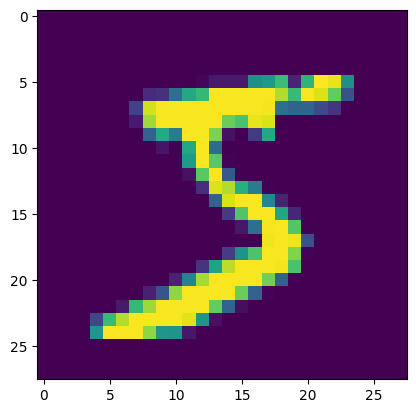

In [ ]:
# image = tf.random.normal(shape=(1, 28, 28))
# plt.figure()
# plt.imshow(tf.squeeze(image))

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
image = tf.reshape(x_train[0,...]/255, shape=(1,28,28))
print('iamge', image.shape)
plt.figure()
plt.imshow(tf.squeeze(image))

In [ ]:
def show_image(output_images, num_channel):
  fig, axs = plt.subplots(1, num_channel, figsize=(5, 5*num_channel))
  for idx in range(len(output_images[0,0,0,:])):
    #print(idx)
    print(output_images[0,:,:,idx].shape) 
    axs[idx].imshow(output_images[0,:,:,idx])

# Step41 - Conv2D Layer

(1, 28, 28, 1)
(1, 24, 24, 6)
(24, 24)
(24, 24)
(24, 24)
(24, 24)
(24, 24)
(24, 24)


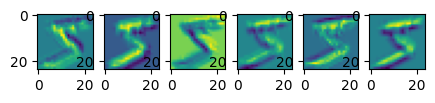

In [ ]:
# tf.keras.layers.Conv2D

# 2D convolution layer (e.g. spatial convolution over images).
# tf.keras.layers.Conv2D(
#     filters,
#     kernel_size,
#     strides=(1, 1),
#     padding='valid',
#     data_format=None,
#     dilation_rate=(1, 1),
#     groups=1,
#     activation=None,
#     use_bias=True,
#     kernel_initializer='glorot_uniform',
#     bias_initializer='zeros',
#     kernel_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     bias_constraint=None,
#     **kwargs
# )

# 4+D tensor with shape: batch_shape + (channels, rows, cols) if data_format='channels_first' or 
# 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'.

# conv_output width = [(28 + 2*0 - 5) / 1 + 1] = 24
# conv_output channel = 6
num_of_kernel = 6
kernel_size = 5
conv_layer1 = tf.keras.layers.Conv2D(filters=num_of_kernel, kernel_size=kernel_size)
input = tf.expand_dims(image, 3) # (1, 28, 28, 1)
print(input.shape)
conv_output = conv_layer1(input)
print(conv_output.shape) # 1, 24, 24, 6

show_image(conv_output, num_of_kernel)

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-12-15-25-58.png" width=400/>


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-12-15-33-24-300x275.png" width=400/>




Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 2)         18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
img.shape= (8, 26, 26)


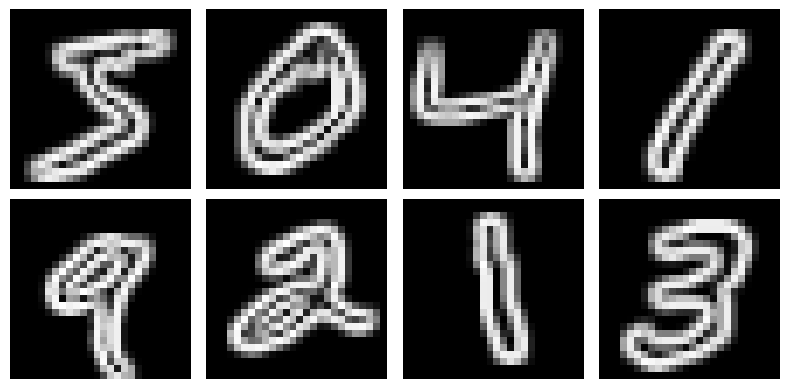

W2.shape= (3, 3, 1, 2)
W2[:,:,0,0]= tf.Tensor(
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]], shape=(3, 3), dtype=float32)
W2[:,:,0,1]= tf.Tensor(
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]], shape=(3, 3), dtype=float32)


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis=3) # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=3) # (10000, 28, 28, 1)

#3: Sobel kernel initial values, shape: (2, 3, 3)
W = np.array([[[-1, 0, 1],      
               [-2, 0, 2],
               [-1, 0, 1]],
              [[-1,-2,-1],      
               [ 0, 0, 0],
               [ 1, 2, 1]]], dtype='float32')
W = np.transpose(W, (1, 2, 0)) # (3, 3, 2)
W=np.expand_dims(W, axis=2) #(3,3,1,2)=(kernel_size[0],kernel_size[1],channels, filters)

#4: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(tf.keras.layers.Conv2D(filters=2,
                                 kernel_size = W.shape[:2], # (3, 3)
                                 use_bias=False,
                                 kernel_initializer=tf.constant_initializer(W)))
model.summary()

#5: apply x_train to model
##output = model.predict(x_train[:8])
output = model(x_train[:8]) # (batch, new_rows, new_cols, filters)
mag = tf.sqrt(tf.square(output[:,:,:,0])+tf.square(output[:,:,:,1]))
max_mag = tf.reduce_max(mag)  # tf.norm(mag, np.inf)
mag = tf.divide(mag, max_mag) # range[ 0, 1]
img = mag.numpy()
print("img.shape=", img.shape)

#6: display images
fig = plt.figure(figsize=(8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(img[i], cmap='gray')
    plt.axis("off")
fig.tight_layout()
plt.show()

#6: weights
W2 = model.trainable_variables[0] # (kernel_size[0], kernel_size[1], channels, filters)
print("W2.shape=", W2.shape)
print("W2[:,:,0,0]=", W2[:,:,0,0]) # 0-channel, 0-filter
print("W2[:,:,0,1]=", W2[:,:,0,1]) # 0-channel, 1-filter

# Step40 - 2D Pooling

(1, 12, 12, 6)
(12, 12)
(12, 12)
(12, 12)
(12, 12)
(12, 12)
(12, 12)


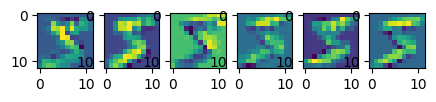

In [ ]:
# tf.keras.layers.MaxPool2D
# Max pooling operation for 2D spatial data.

# tf.keras.layers.MaxPool2D(
#     pool_size=(2, 2),
#     strides=None,
#     padding='valid',
#     data_format=None,
#     **kwargs
# )

pool_layer1 = tf.keras.layers.MaxPool2D()
pool_output=pool_layer1(conv_output)
print(pool_output.shape)
show_image(pool_output, num_of_kernel)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 1)        0         
 g2D)                                                            
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 61ms/step
img.shape= (8, 14, 14)


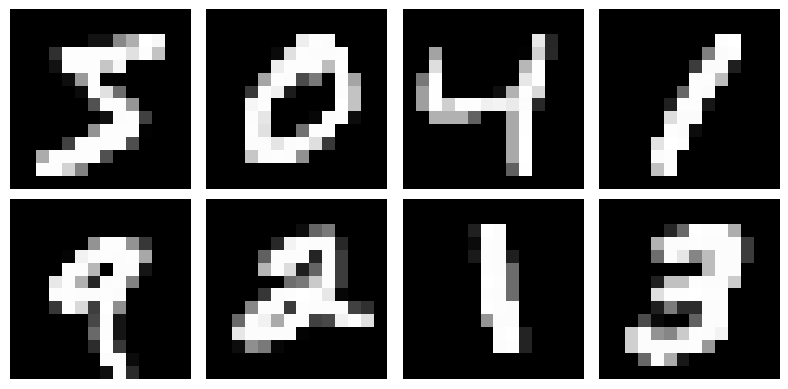

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#1: 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus, True)

#2
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
##print("x_train.shape=", x_train.shape) # (60000, 28, 28)
##print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis=3) # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=3) # (10000, 28, 28, 1)

#3: build a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(tf.keras.layers.MaxPool2D())
##model.add(tf.keras.layers.AveragePooling2D())
model.summary()

#4: apply x_train to model
output = model.predict(x_train[:8]) #(batch, pooled_rows, pooled_cols, channels)
img = output[:,:,:,0] # 0-filter
##img = np.squeeze(output.numpy(), axis = 3) # remove filters-axis
print("img.shape=", img.shape)

#5: display images
fig = plt.figure(figsize=(8, 4))
for i in range(8):   
    plt.subplot(2, 4, i + 1)  
    plt.imshow(img[i], cmap='gray')
    plt.axis("off")
fig.tight_layout()
plt.show()


## Flatten Layer

<img src="https://static.wixstatic.com/media/5adb1b_ef9160a7c14b4b93978297508262dfeb~mv2.png" width=400/>


In [ ]:
features = tf.random.normal(shape=(32, 28, 28, 1))
flatten_layer = tf.keras.layers.Flatten()
output=flatten_layer(features)
print('flatten weight', flatten_layer.get_weights())
print('output', output.shape) # expected 32 x 784

flatten weight []
output (32, 784)


## Dense layer

<img src="https://pysource.com/wp-content/uploads/2022/08/flatten-and-dense-layers-computer-vision-with-keras-p-6-dense-layer-scheme.jpg" width=400/>


In [ ]:
features = tf.random.normal(shape=(32, 784))
dense_layer = tf.keras.layers.Dense(64)
output=dense_layer(features)
print('dense weight', dense_layer.get_weights()[0].shape)
print('dense bias', dense_layer.get_weights()[1].shape)
print('output', output.shape)

dense weight (784, 64)
dense bias (64,)
output (32, 64)


In [ ]:
batch_images = tf.reshape(x_train[0:32,...]/255, shape=(32,28,28))
layer1 = tf.keras.layers.Dense(10, input_shape=(28, 28), activation='softmax')
output = layer1(batch_images)
print('output', output.shape)
print('dense weight', layer1.get_weights()[0].shape)
print('dense bias', layer1.get_weights()[1].shape)

output (32, 28, 10)
dense weight (28, 10)
dense bias (10,)


# Step42 - 2D CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt

#1: 
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test  /= 255.0

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis=3) # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=3) # (10000, 28, 28, 1)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3: build a model
model = tf.keras.Sequential()
model.add(Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(Conv2D(filters=16, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout( rate=0.2))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.summary()


2023-05-03 04:38:09.491250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 04:38:09.584155: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                        

2023-05-03 04:38:11.147923: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-03 04:38:11.163626: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-03 04:38:11.163740: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-03 04:38:11.164006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other 

Epoch 1/100


2023-05-03 04:38:18.334675: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-03 04:38:19.331570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-05-03 04:38:20.307844: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-03 04:38:20.450171: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-03 04:38:20.457358: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fe18fb226a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-03 04:38:20.457370: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor devi

150/150 - 4s - loss: 0.4694 - accuracy: 0.8795 - val_loss: 2.2025 - val_accuracy: 0.3852 - 4s/epoch - 26ms/step
Epoch 2/100
150/150 - 1s - loss: 0.0917 - accuracy: 0.9724 - val_loss: 1.4266 - val_accuracy: 0.9065 - 611ms/epoch - 4ms/step
Epoch 3/100
150/150 - 1s - loss: 0.0673 - accuracy: 0.9801 - val_loss: 0.1352 - val_accuracy: 0.9725 - 610ms/epoch - 4ms/step
Epoch 4/100
150/150 - 1s - loss: 0.0575 - accuracy: 0.9825 - val_loss: 0.0364 - val_accuracy: 0.9880 - 612ms/epoch - 4ms/step
Epoch 5/100
150/150 - 1s - loss: 0.0500 - accuracy: 0.9848 - val_loss: 0.0468 - val_accuracy: 0.9845 - 610ms/epoch - 4ms/step
Epoch 6/100
150/150 - 1s - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0339 - val_accuracy: 0.9897 - 610ms/epoch - 4ms/step
Epoch 7/100
150/150 - 1s - loss: 0.0416 - accuracy: 0.9872 - val_loss: 0.0426 - val_accuracy: 0.9890 - 615ms/epoch - 4ms/step
Epoch 8/100
150/150 - 1s - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0402 - val_accuracy: 0.9881 - 628ms/epoch - 4ms/step
Epoch 

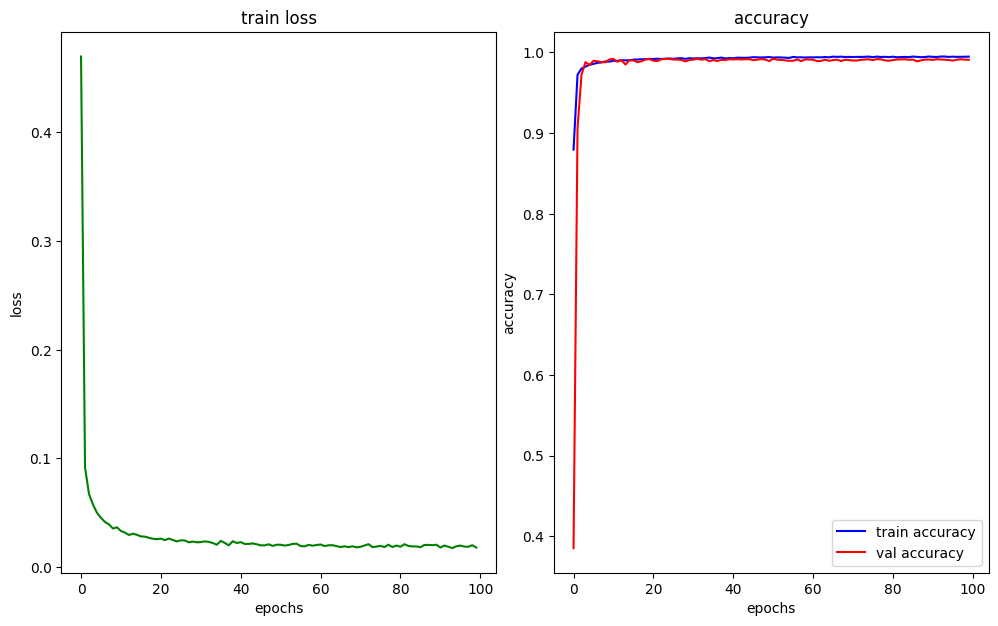

In [ ]:
#4: train and evaluate the model
opt = RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=50, batch_size=400, 
                validation_data = (x_test, y_test), verbose=2)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#5: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

#1: 
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test  /= 255.0

# expand data with channel = 1
x_train = np.expand_dims(x_train,axis=3) # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=3) # (10000, 28, 28, 1)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3: build a sequential model
model = tf.keras.Sequential()
model.add(Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(Conv2D(filters=16, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout( rate=0.2))

model.add(Flatten())
model.add(Dense(units=128, activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 batch_normalization_9 (Batc  (None, 26, 26, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                      

Epoch 1/100


2023-05-03 04:45:55.002627: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


150/150 - 2s - loss: 0.7550 - accuracy: 0.7555 - val_loss: 2.2815 - val_accuracy: 0.1000 - 2s/epoch - 11ms/step
Epoch 2/100
150/150 - 1s - loss: 0.4502 - accuracy: 0.8430 - val_loss: 2.0960 - val_accuracy: 0.1024 - 662ms/epoch - 4ms/step
Epoch 3/100
150/150 - 1s - loss: 0.3898 - accuracy: 0.8649 - val_loss: 1.4192 - val_accuracy: 0.7537 - 648ms/epoch - 4ms/step
Epoch 4/100
150/150 - 1s - loss: 0.3531 - accuracy: 0.8737 - val_loss: 0.5061 - val_accuracy: 0.8551 - 646ms/epoch - 4ms/step
Epoch 5/100
150/150 - 1s - loss: 0.3318 - accuracy: 0.8823 - val_loss: 0.3266 - val_accuracy: 0.8826 - 642ms/epoch - 4ms/step
Epoch 6/100
150/150 - 1s - loss: 0.3140 - accuracy: 0.8887 - val_loss: 0.2881 - val_accuracy: 0.8964 - 643ms/epoch - 4ms/step
Epoch 7/100
150/150 - 1s - loss: 0.2996 - accuracy: 0.8924 - val_loss: 0.2778 - val_accuracy: 0.8983 - 647ms/epoch - 4ms/step
Epoch 8/100
150/150 - 1s - loss: 0.2907 - accuracy: 0.8948 - val_loss: 0.2896 - val_accuracy: 0.8939 - 643ms/epoch - 4ms/step
Epoch 

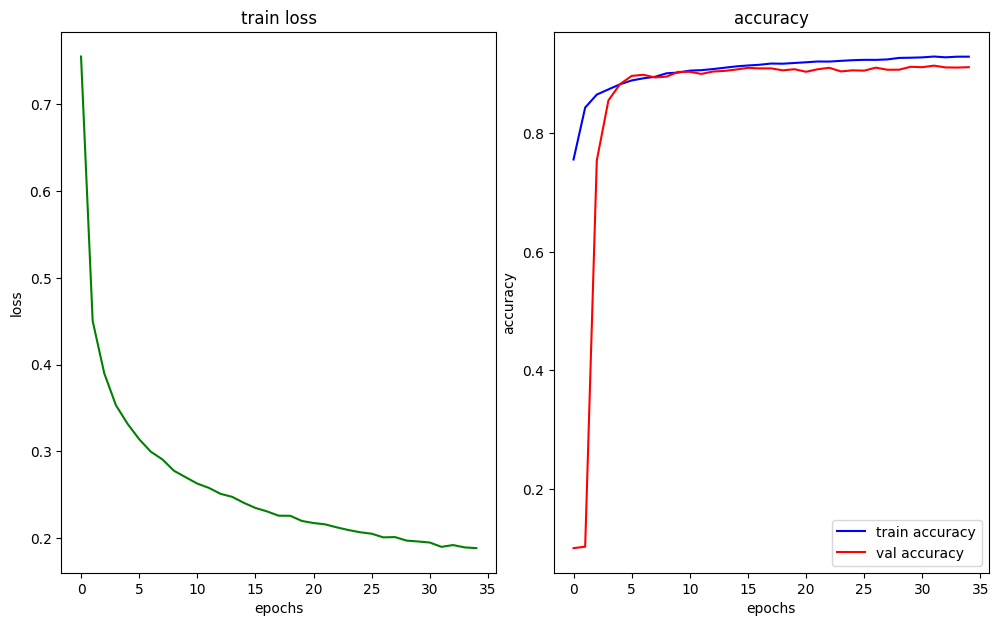

In [ ]:

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Quantity to be monitored.
    min_delta = 0.001,   # Minimum change in the monitored quantity to qualify as an improvement,
    patience=20,          # Number of epochs with no improvement
    verbose=2,
    mode = 'auto',       #'min','max', 'auto'
    ) 

#4: train and evaluate the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400, 
               validation_data = (x_test, y_test), verbose=2, callbacks=[callback])

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#5: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

#1: 
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') # (50000, 32, 32, 3)
x_test  = x_test.astype('float32')  # (10000, 32, 32, 3)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3:
def normalize_image(image): # 3-channel
    mean=  np.mean(image, axis = (0, 1, 2))
    std =   np.std(image, axis  = (0, 1, 2))
    image = (image-mean)/std
    return image
x_train= normalize_image(x_train) # range: N(mean, std]
x_test = normalize_image(x_test)

#4: build a sequential model
model = tf.keras.Sequential()
model.add(Input(x_train.shape[1:])) # shape=(28, 28, 1)
model.add(Conv2D(filters=16, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout( rate=0.2))

model.add(Flatten())
model.add(Dense(units=128, activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_11 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                      

2023-05-03 04:48:29.980978: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_11/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 81: early stopping
1563/1563 - 1s - loss: 0.5843 - accuracy: 0.7987 - 1s/epoch - 923us/step
313/313 - 0s - loss: 0.8420 - accuracy: 0.7173 - 257ms/epoch - 822us/step


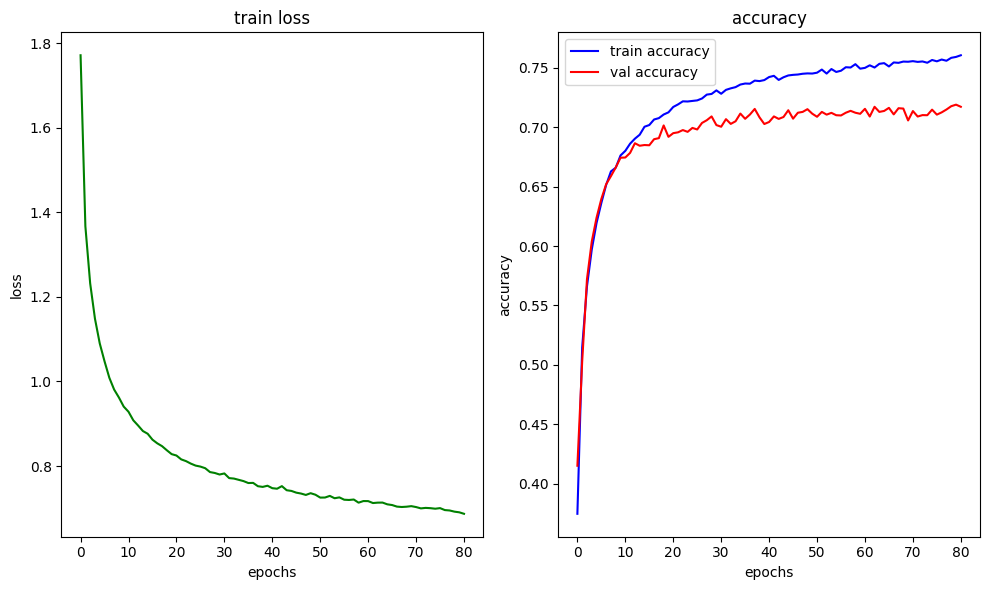

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Quantity to be monitored.
    min_delta = 0.001,   # Minimum change in the monitored quantity to qualify as an improvement,
    patience=20,          # Number of epochs with no improvement
    verbose=2,
    mode = 'auto',       #'min','max', 'auto'
    ) 

#5: train and evaluate the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400,
               validation_data = (x_test, y_test), verbose=2, callbacks=[callback])
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#6: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Dense  
from tensorflow.keras.layers   import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

#1: 
##gpus = tf.config.experimental.list_physical_devices('GPU')
##tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar100.load_data() # 'fine'
x_train = x_train.astype('float32') # (50000, 32, 32, 3)
x_test  = x_test.astype('float32')  # (10000, 32, 32, 3)

# one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3:
def normalize_image(image): # 3-channel
    mean=  np.mean(image, axis = (0, 1, 2))
    std =  np.std(image, axis = (0, 1, 2))
    image = (image-mean)/std
    return image
x_train= normalize_image(x_train) # range: N(mean,std]
x_test = normalize_image(x_test)

#4: build a model
model = tf.keras.Sequential()
model.add(Input(shape=x_train.shape[1:])) #  shape=(32, 32, 3)

model.add(Conv2D(filters=16, kernel_size = (7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=256, kernel_size=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPool2D())
model.add(tf.keras.layers.GlobalMaxPool2D())
#model.add(Dropout(rate=0.5))

model.add(Flatten())
#model.add(Dense(units=512, activation='softmax')) # 100 classes 
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=100, activation='softmax')) # 100 classes 
model.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 32, 32, 16)        2368      
                                                                 
 batch_normalization_82 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 dropout_65 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_82 (Conv2D)          (None, 16, 16, 32)        12832     
                                                                 
 batch_normalization_83 (Bat  (None, 16, 16, 32)     

Epoch 1/200


2023-05-03 05:35:48.281898: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_25/dropout_65/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 - 4s - loss: 4.6957 - accuracy: 0.0510 - val_loss: 4.3748 - val_accuracy: 0.0411 - 4s/epoch - 29ms/step
Epoch 2/200
125/125 - 2s - loss: 4.0250 - accuracy: 0.0969 - val_loss: 4.0251 - val_accuracy: 0.0794 - 2s/epoch - 13ms/step
Epoch 3/200
125/125 - 2s - loss: 3.6989 - accuracy: 0.1351 - val_loss: 3.5505 - val_accuracy: 0.1659 - 2s/epoch - 13ms/step
Epoch 4/200
125/125 - 2s - loss: 3.4849 - accuracy: 0.1690 - val_loss: 3.2825 - val_accuracy: 0.2138 - 2s/epoch - 13ms/step
Epoch 5/200
125/125 - 2s - loss: 3.2982 - accuracy: 0.1960 - val_loss: 3.0520 - val_accuracy: 0.2569 - 2s/epoch - 13ms/step
Epoch 6/200
125/125 - 2s - loss: 3.1542 - accuracy: 0.2265 - val_loss: 2.9508 - val_accuracy: 0.2751 - 2s/epoch - 13ms/step
Epoch 7/200
125/125 - 2s - loss: 3.0508 - accuracy: 0.2423 - val_loss: 2.8291 - val_accuracy: 0.2933 - 2s/epoch - 13ms/step
Epoch 8/200
125/125 - 2s - loss: 2.9675 - accuracy: 0.2590 - val_loss: 2.8129 - val_accuracy: 0.2972 - 2s/epoch - 13ms/step
Epoch 9/200
125/125 

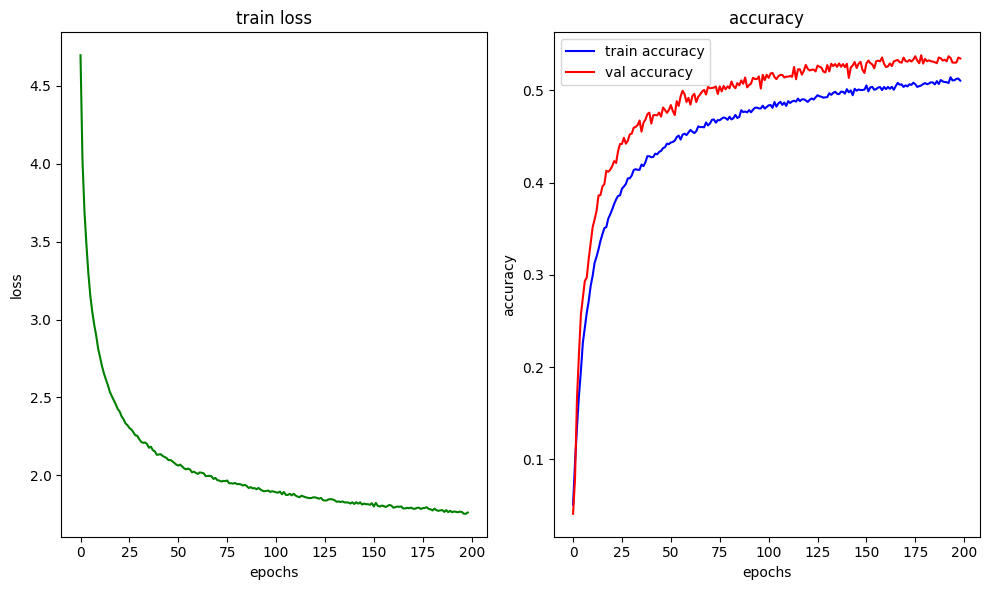

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Quantity to be monitored.
    min_delta = 0.001,   # Minimum change in the monitored quantity to qualify as an improvement,
    patience=20,          # Number of epochs with no improvement
    verbose=2,
    mode = 'auto',       #'min','max', 'auto'
    ) 

#5: train and evaluate the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=200, batch_size=400,
                validation_data = (x_test, y_test), verbose=2, callbacks=[callback])
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#6: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(ret.history['loss'],  "g-") #, label="train loss")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()


# Lab - LeNet-5

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-18-12-52-17.png" width=800 />

[ani](https://thumbs.gfycat.com/AffectionateMemorableGreyhounddog-mobile.mp4)


Implement the LeNet-5 architecture using TensorFlow to classify handwritten digits from the MNIST dataset.

You are provided with a layer-by-layer diagram of the LeNet-5 model, which consists of the following layers:

* Convolutional Layer (C1): 6 filters, kernel size 5x5, stride 1, valid padding.
* Max Pooling Layer (S2): 2x2 pool size, stride 2.
* Convolutional Layer (C3): 16 filters, kernel size 5x5, stride 1, valid padding.
* Max Pooling Layer (S4): 2x2 pool size, stride 2.
* Convolutional Layer (C5): 120 filters, kernel size 4x4, stride 1, valid padding.
* Flatten Layer (S6)
* Fully Connected Layer (F7): 84 units.
* Output Layer (Output): 10 units (for the 10 digits 0-9) with softmax activation.